In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.15


In [3]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object

In [4]:
def act(t,robot):

    tx,ty = 10,20
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y

    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d=sqrt( (lx-cx)**2 + (ly-cy)**2)
    
    F=d*20
    angle=degrees(arctan2(ty-cy,tx-cx))
    
    robot['left'].F=robot['right'].F=F
    robot['left'].F_angle=robot['right'].F_angle=angle
    

def act2(t,robot):

    tx,ty = 20,5
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y

    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d=sqrt( (lx-cx)**2 + (ly-cy)**2)
    
    F=d*20
    angle=degrees(arctan2(ty-cy,tx-cx))
    
    robot['left'].F=robot['right'].F=F
    robot['left'].F_angle=robot['right'].F_angle=angle
    
        

In [5]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

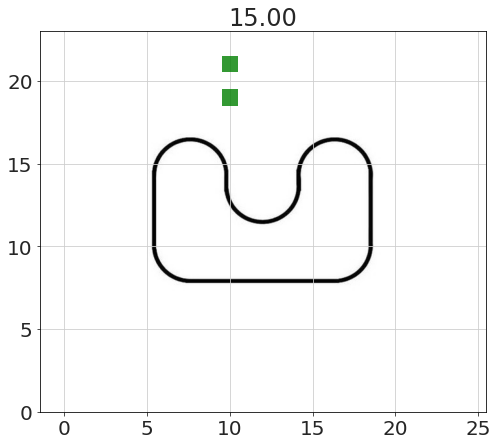

In [6]:
run_sim(env,act,
        total_time=15,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

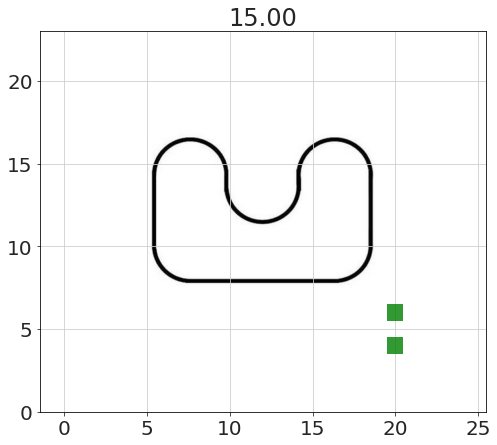

In [7]:
run_sim(env,act2,
        total_time=15,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

## what happens if the robot is at a different orientation or the orientation shifts due to a collision?

It seems to get there, but I am not sure this is guaranteed

In [8]:
def act(t,robot):

    tx,ty = 20,20
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y

    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d=sqrt( (lx-cx)**2 + (ly-cy)**2)
    
    F=d*20
    angle=degrees(arctan2(ty-cy,tx-cx))
    
    robot['left'].F=robot['right'].F=F
    robot['left'].F_angle=robot['right'].F_angle=angle
    

In [9]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

Box(env,5,11)


build(robot)

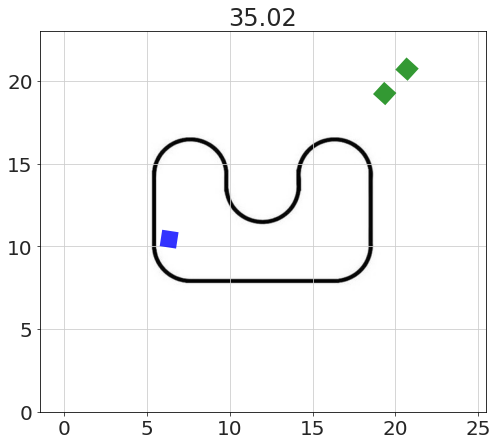

In [10]:
run_sim(env,act,
        total_time=35,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [11]:
def act(t,robot):

    tx,ty = 20,20
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y

    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d=sqrt( (lx-cx)**2 + (ly-cy)**2)
    
    F=d*20
    angle=degrees(arctan2(ty-cy,tx-cx))-robot['right'].angle
    
    robot['left'].F=F 
    robot['right'].F=F 
    robot['left'].F_angle=robot['right'].F_angle=angle
    

In [12]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

Box(env,5,11)


build(robot)

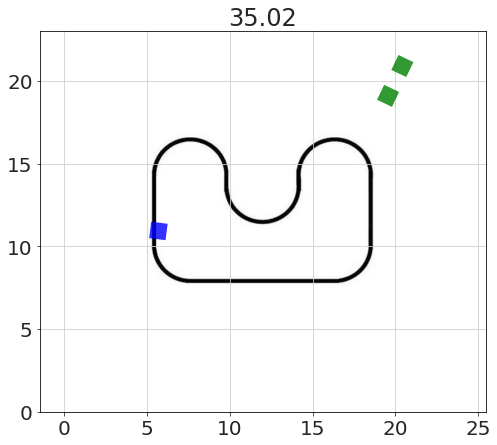

In [13]:
run_sim(env,act,
        total_time=35,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

## what if I want to realign to angle 0?

Add a piece to the robot that applies a torque to bring the robot to a target angle

In [14]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    center=Disk(robot,2,11,radius=0.2,name='center')
    
    connect(left,right,'weld')  # revolves around the middle of the second object
    connect(left,center,'weld')
    connect(right,center,'weld')

In [15]:
def act(t,robot):

    tx,ty = 20,20
    
    lx,ly=robot['left'].x,robot['left'].y
    rx,ry=robot['right'].x,robot['right'].y

    cx = (lx+rx)/2
    cy = (ly+ry)/2
    
    d=sqrt( (lx-cx)**2 + (ly-cy)**2)
    
    F=d*20
    angle=degrees(arctan2(ty-cy,tx-cx))-robot['right'].angle
    
    ta=0  # target angle
    a=robot['right'].angle
    
    da = ta - a
    # deal with the wrap around at 360 degrees for angle
    if da>180:
        da-=360
    if da<-180:
        da+=360
    
    
    robot['center'].τ=da/10
    
    robot.message='%.1f %.1f' % (a,da)
    robot['left'].F=F 
    robot['right'].F=F 
    robot['left'].F_angle=robot['right'].F_angle=angle
    

In [16]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

Box(env,5,11)


build(robot)

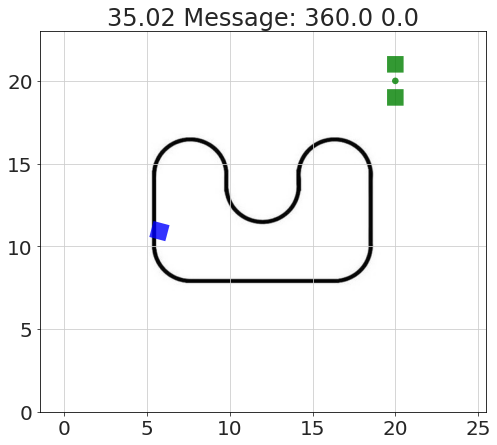

In [17]:
run_sim(env,act,
        total_time=35,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )